In [1]:
# standard library imports
import glob
import json
import warnings

# local imports
from amptools.io.read import read_data
from amptools.stream import group_channels
from pgm.station_summary import StationSummary

# Introduction to StationSummary

Read in files using the standard read_data method, which will determine the format and choose the correct reader.

Notice that each file was an individual channel.

In [2]:
knet_files = '../tests/data/knet/*'
streams = []
for filepath in glob.glob(knet_files):
    streams += [read_data(filepath)]
for stream in streams:
    print(stream[0].stats['station'], '# traces:', len(stream))

AOM001 # traces: 1
AOM001 # traces: 1
AOM001 # traces: 1
AOM002 # traces: 1
AOM002 # traces: 1
AOM002 # traces: 1
AOM003 # traces: 1
AOM003 # traces: 1
AOM003 # traces: 1
AOM004 # traces: 1
AOM004 # traces: 1
AOM004 # traces: 1
AOM005 # traces: 1
AOM005 # traces: 1
AOM005 # traces: 1
AOM006 # traces: 1
AOM006 # traces: 1
AOM006 # traces: 1
AOM007 # traces: 1
AOM007 # traces: 1
AOM007 # traces: 1
AOM008 # traces: 1
AOM008 # traces: 1
AOM008 # traces: 1
AOM009 # traces: 1
AOM009 # traces: 1
AOM009 # traces: 1


### Amptools has channel grouping capability that combines traces from the same station and event into one stream.

In [3]:
grouped_streams = group_channels(streams)
for stream in grouped_streams:
    print(stream[0].stats['station'], '# traces:', len(stream))

AOM001 # traces: 3
AOM002 # traces: 3
AOM003 # traces: 3
AOM004 # traces: 3
AOM005 # traces: 3
AOM006 # traces: 3
AOM007 # traces: 3
AOM008 # traces: 3
AOM009 # traces: 3


## Station Summaries for each stream
Creating a station summary for each stream will result in a dictionary of requested peak ground motions, a dictionary of oscillators (one for each required by an IMT), as well as information about the summary itself.

Notice that invalid or duplicate requests are ignored.

In [8]:
imcs = ['channels', 'CHANNELS', 'greater_of_two_horizontals', 'gmrotd0', 'GMROTD50', 'gmrotd100']
imts = ['PGA', 'pga', 'pgv', 'sa(1.0)', 'sa(3.0)', 'sa(0.3)', 'saINVALID']

# station summary for first stream
station = StationSummary.from_stream(grouped_streams[0], imcs, imts)
print(json.dumps(station.pgms, indent=4))

/Users/hschovanec/Repositories/shakemap-amp-tools/pgm/station_summary.py:208: Warning: Invalid period for imt: 'saINVALID'. Skipping...
  warnings.warn(fmt % (imt), Warning)


{
    "PGA": {
        "HNZ": 0.22841944586132976,
        "HN2": 0.4158701103977045,
        "GREATER_OF_TWO_HORIZONTALS": 0.5052027178428995,
        "GMROTD0.0": 0.414426185083567,
        "GMROTD50.0": 0.4519712774169201,
        "GMROTD100.0": 0.4606143660529968,
        "HN1": 0.5052027178428995
    },
    "PGV": {
        "HNZ": 0.18539975692640684,
        "HN2": 0.34893929775907784,
        "GREATER_OF_TWO_HORIZONTALS": 0.34893929775907784,
        "GMROTD0.0": 0.2825455204956558,
        "GMROTD50.0": 0.3182306977157594,
        "GMROTD100.0": 0.34410454833435355,
        "HN1": 0.2821511314607453
    },
    "SA(3.0)": {
        "HNZ": 0.038648103167209916,
        "HN2": 0.1420942776482077,
        "GREATER_OF_TWO_HORIZONTALS": 0.1420942776482077,
        "GMROTD0.0": 0.09070851601583252,
        "GMROTD50.0": 0.09250547822621205,
        "GMROTD100.0": 0.09801715464477015,
        "HN1": 0.07359147739051942
    },
    "SA(0.3)": {
        "HNZ": 0.7890538279535261,
        

You can also access the spectral amplitudes and velocity used to created these peak ground motions.

---------------------------- Velocity ----------------------------


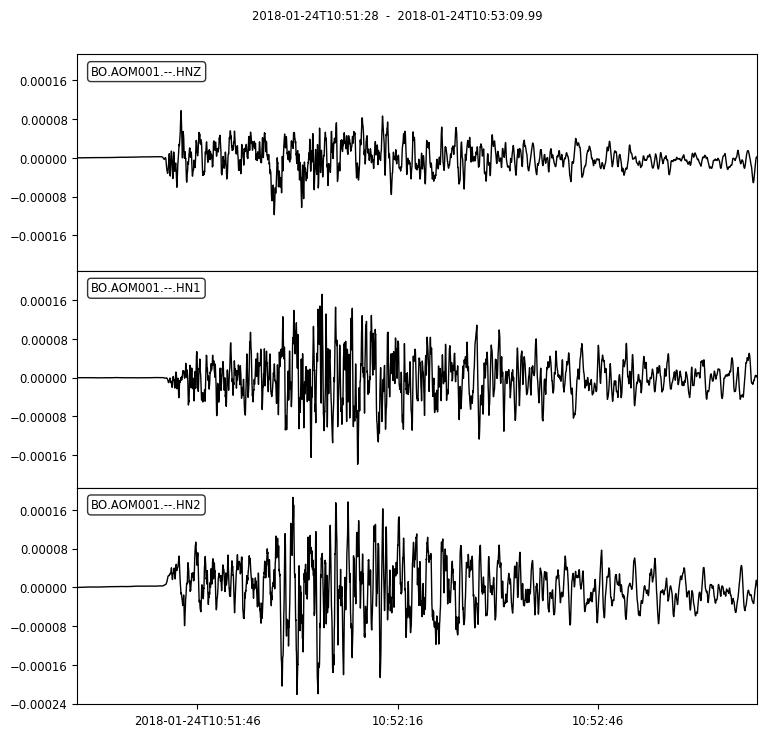

---------------------------- SA(3.0) ----------------------------


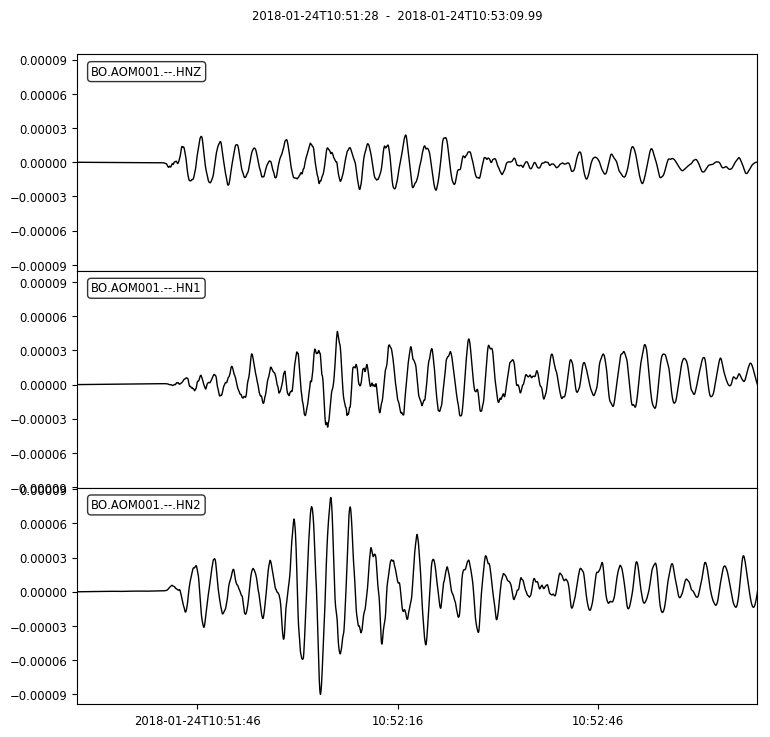

In [17]:
# Since a stream of velocity was required to calculate the PGV value, the oscillator is called PGV
velocity_stream = station.oscillators['PGV']
print('---------------------------- Velocity ----------------------------')
velocity_stream.plot(draw=True)

# Spectral amplitudes with a period of 3
print('---------------------------- SA(3.0) ----------------------------')
sa30_stream = station.oscillators['SA(3.0)']
sa30_stream.plot(draw=True)